# Question 1

For this question use the World Bank Data for Turkey for the following indicators. Use [wbgapi](https://pypi.org/project/wbgapi/) for getting the data.

* [Literacy rate, adult female (SE.ADT.LITR.FE.ZS)](https://data.worldbank.org/indicator/SE.ADT.LITR.FE.ZS)
* [Labor force, female (SL.TLF.TOTL.FE.ZS)](https://data.worldbank.org/indicator/SL.TLF.TOTL.FE.ZS)
* [Poverty headcount ratio at national poverty lines (SI.POV.NAHC)](https://data.worldbank.org/indicator/SI.POV.NAHC)
* [Current health expenditure per capita (SH.XPD.CHEX.PC.CD)](https://data.worldbank.org/indicator/SH.XPD.CHEX.PC.CD)
* [GDP per capita (NY.GDP.PCAP.CD)](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD)
* [Mortality rate, under-5 (SH.DYN.MORT)](https://data.worldbank.org/indicator/SH.DYN.MORT)


Using the [statsmodels](https://www.statsmodels.org/stable/index.html) library write the best linear regression model using child mortality as the dependent variable while the rest are considered as independent variables. Pay particular attention to the fact that the order of the variables put into the model significantly impacts the performance of the model. Choose the best model by considering

* with the minimum number of variables and their interactions,
* with the optimal ordering of the independent variables and their interactions,
* $R^2$-score of the model,
* statistical significance of the model coefficients,
* ANOVA analysis of the model.


In [75]:
import wbgapi as wb
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.formula.api import ols
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report


In [ ]:
labor = pd.DataFrame(list(wb.data.fetch('SL.TLF.TOTL.FE.ZS')))


In [ ]:
litrate = pd.DataFrame(list(wb.data.fetch('SE.ADT.LITR.FE.ZS')))
poverty = pd.DataFrame(list(wb.data.fetch('SI.POV.NAHC')))
health = pd.DataFrame(list(wb.data.fetch('SH.XPD.CHEX.PC.CD')))
gdp = pd.DataFrame(list(wb.data.fetch('NY.GDP.PCAP.CD')))
mortality = pd.DataFrame(list(wb.data.fetch('SH.DYN.MORT')))

I wrote a function "*extract*" which takes data and name of data as input and returns Turkey's value column in the data

In [ ]:
def extract(df,name):
    tmp = df[['time','value']][df['economy']=="TUR"]
    tmp.index = tmp.time
    del tmp['time']
    tmp.columns = [[name]]
    return tmp


*data_prep* function takes dependent variable, names of dependent variable, features of dependent variable and names of features ad input, then returns a adjoint dataframe which consist dependent variable and it's features

*mls_model* function takes adjoint dataframe which returned by data_prep function, name of dependent variable and the names of features as input, then returns a ordinary linear regression model

In [ ]:
def data_prep(main,name,features,names):
    dependent = extract(main,str(name))
    
    arr = []
    for i in range(len(names)):
        arr.append(extract(features[i],names[i]))

    res = dependent.join(arr)
    res.dropna(inplace=True)


    return res

def mls_model(res,name,names):
    
    string = " + ".join(names)
    model = ols(name+' ~ '+string, data=res).fit()
    
    return model

   


I wanted to make index values integers so i wrote a for loop

In [ ]:
features = [labor,poverty,health,gdp,litrate]
names = ["labor","poverty","health","gdp","litrate"]

for j in features:
    res = i
    arr=[]
    for i in res['time']:
        arr.append(int(i[2:]))

    res["time"] = arr
    res

I made a correlation map to see which features are more correlated with mortality data

<AxesSubplot:xlabel='None', ylabel='None'>

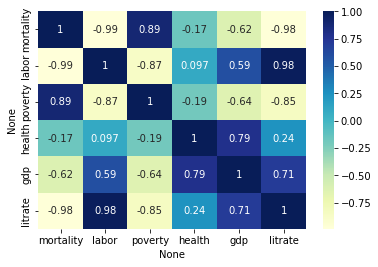

In [ ]:

data = data_prep(mortality,"mortality",features,names)
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)



In [26]:
features = [labor,litrate,gdp]
names = ["labor","litrate","gdp"]


data = data_prep(mortality,"mortality",features,names)
model = mls_model(data,"mortality",names)

y = data[["mortality"]]
x = data[["poverty"]]

a,b = model.params


print(model.summary())

sm.stats.anova_lm(model)

plt.scatter(x,y,c='red')
plt.plot(x,a + b*x)



NameError: name 'labor' is not defined

In [ ]:
features = [health,litrate,labor]
names = ["health","litrate","labor"]


data = data_prep(mortality,"mortality",features,names)
model = mls_model(data,"mortality",names)
print(model.summary())

sm.stats.anova_lm(model)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     219.7
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           2.01e-09
Time:                        18:00:21   Log-Likelihood:                -14.444
No. Observations:                  14   AIC:                             36.89
Df Residuals:                      10   BIC:                             39.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.5870      8.976      7.641      0.0

/Users/emirysaglam/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,df,sum_sq,mean_sq,F,PR(>F)
health,1.0,87.873735,87.873735,136.165003,3.798810e-07
litrate,1.0,324.518432,324.518432,502.858486,6.993128e-10
labor,1.0,12.911502,12.911502,20.007055,1.192009e-03
Residual,10.0,6.453474,0.645347,NaN,NaN


# Question 2

For this question use Yahoo's Finance API for the following tickers:

* Gold futures (GC=F)
* Silver futures (SI=F)
* Copper futures (HG=F)
* Platinum futures (PL=F)

1. Write the best linear regression model that explains gold futures closing prices in terms of opening prices of gold, silver, copper, and platinum futures.
2. Repeat the same for silver, copper and platinum prices.
3. Compare the models you obtained in Steps 1 and 2. Which model is better? How do you decide? Explain.

In [5]:
import yfinance as yf

In [6]:
gold =yf.download("GC=F",  start = "2000-01-01" , end = "2022-01-31")
silver =yf.download("SI=F",  start = "2000-01-01" , end = "2022-01-31")
copper =yf.download("HG=F",  start = "2000-01-01" , end = "2022-01-31")
plat =yf.download("PL=F",  start = "2000-01-01" , end = "2022-01-31")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
gold

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30 00:00:00-04:00,273.899994,273.899994,273.899994,273.899994,273.899994,0
2000-08-31 00:00:00-04:00,274.799988,278.299988,274.799988,278.299988,278.299988,0
2000-09-01 00:00:00-04:00,277.000000,277.000000,277.000000,277.000000,277.000000,0
2000-09-05 00:00:00-04:00,275.799988,275.799988,275.799988,275.799988,275.799988,2
2000-09-06 00:00:00-04:00,274.200012,274.200012,274.200012,274.200012,274.200012,0
...,...,...,...,...,...,...
2022-01-24 00:00:00-05:00,1837.900024,1842.099976,1837.900024,1841.699951,1841.699951,8
2022-01-25 00:00:00-05:00,1843.000000,1852.699951,1842.000000,1852.699951,1852.699951,11
2022-01-26 00:00:00-05:00,1829.900024,1829.900024,1829.900024,1829.900024,1829.900024,55


In [ ]:
def extract2(df,name,col):
    tmp = df[[str(col)]]
    tmp.columns = [[name]]
    return tmp

In [ ]:
def data_prep2(dpn,name,features,names):
    dependent = extract2(dpn,str(name),"Close")
    
    arr = []
    for i in range(len(names)):
        arr.append(extract2(features[i],names[i],"Open"))

    res = dependent.join(arr)
    res.dropna(inplace=True)

    return res

def mls_model2(res,name,names):
    
    string = " + ".join(names)
    model = ols(name+' ~ '+string, data=res).fit()
    
    return model

   

<AxesSubplot:xlabel='None', ylabel='None'>

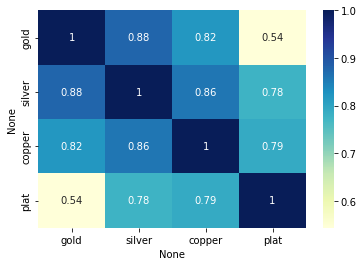

In [ ]:
f = [silver,copper,plat]
n = ["silver","copper","plat"]

data = data_prep2(gold,"gold",f,n)
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [ ]:
f = [silver,copper]
n = ["silver","copper",]


data = data_prep2(gold,"gold",f,n)
model = mls_model2(data,"gold",n)

print(model.summary())

sm.stats.anova_lm(model)

                            OLS Regression Results                            
Dep. Variable:                   gold   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     9716.
Date:                Fri, 04 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:31:55   Log-Likelihood:                -36874.
No. Observations:                5371   AIC:                         7.375e+04
Df Residuals:                    5368   BIC:                         7.377e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    153.1879      8.260     18.546      0.0

,df,sum_sq,mean_sq,F,PR(>F)
silver,1.0,1.039007e+09,1.039007e+09,19305.182126,0.000000e+00
copper,1.0,6.861324e+06,6.861324e+06,127.486292,3.099297e-29
Residual,5368.0,2.889063e+08,5.382009e+04,NaN,NaN


In [ ]:
f = [silver,plat,gold]
n = ["silver","plat","gold"]


data = data_prep2(copper,"copper",f,n)
model = mls_model2(data,"copper",n)
print(model.summary())

sm.stats.anova_lm(model)

                            OLS Regression Results                            
Dep. Variable:                 copper   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     8139.
Date:                Fri, 04 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:41:56   Log-Likelihood:                -2779.5
No. Observations:                4670   AIC:                             5567.
Df Residuals:                    4666   BIC:                             5593.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3128      0.025    -12.470      0.0

,df,sum_sq,mean_sq,F,PR(>F)
silver,1.0,4126.799766,4126.799766,21416.373067,0.000000e+00
plat,1.0,217.178097,217.178097,1127.063926,1.605065e-221
gold,1.0,360.853665,360.853665,1872.680323,0.000000e+00
Residual,4666.0,899.108717,0.192694,NaN,NaN


In [ ]:
f = [copper,silver]
n = ["copper","silver",]


data = data_prep2(plat,"plat",f,n)
model = mls_model2(data,"plat",n)
print(model.summary())

sm.stats.anova_lm(model)

                            OLS Regression Results                            
Dep. Variable:                   plat   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     4547.
Date:                Fri, 04 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:43:33   Log-Likelihood:                -31762.
No. Observations:                4672   AIC:                         6.353e+04
Df Residuals:                    4669   BIC:                         6.355e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    409.3707      8.248     49.631      0.0

,df,sum_sq,mean_sq,F,PR(>F)
copper,1.0,4.047926e+08,4.047926e+08,8597.146766,0.000000e+00
silver,1.0,2.338067e+07,2.338067e+07,496.568042,1.270472e-104
Residual,4669.0,2.198376e+08,4.708452e+04,NaN,NaN


In [ ]:
f = [copper,plat,gold]
n = ["copper","plat","gold"]


data = data_prep2(silver,"silver",f,n)
model = mls_model2(data,"silver",n)
print(model.summary())

sm.stats.anova_lm(model)

                            OLS Regression Results                            
Dep. Variable:                 silver   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 1.373e+04
Date:                Fri, 04 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:46:32   Log-Likelihood:                -11428.
No. Observations:                4670   AIC:                         2.286e+04
Df Residuals:                    4666   BIC:                         2.289e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.4994      0.132    -49.377      0.0

,df,sum_sq,mean_sq,F,PR(>F)
copper,1.0,265054.184952,265054.184952,33870.312751,0.000000e+00
plat,1.0,9081.580276,9081.580276,1160.502198,2.338045e-227
gold,1.0,48311.151128,48311.151128,6173.506743,0.000000e+00
Residual,4666.0,36514.065757,7.825561,NaN,NaN


# Question 3

1. Write a function that takes a ticker symbol and returns a pandas dataframe that for each day puts a 1 when the closing price is higher than the opening price, a 0 when the closing price is lower than the opening price.
2. Write the best logistic regression that predicts the time series you obtain from Step 1 for gold futures against the opening prices of gold, silver, copper, and platinum prices.
3. Repeat the same for silver, copper, and platinum prices.
4. Compare the models you obtained from Steps 2 and 3. Decide which is the best model, and explain your reasoning.
5. Does any of the models provide a good fit? Explain.

In [7]:
from statsmodels.formula.api import logit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix



In [8]:
def logic(tic):
    
    data = yf.download(tic,  start = "2000-01-01" , end = "2022-01-31")
    col1 = []
    
    for i in range(data["Close"].shape[0]):
        if data["Close"][i] > data["Open"][i]:
            col1.append(1)
        if data["Close"][i] <= data["Open"][i]:
            col1.append(0)
    
    out = pd.DataFrame(data={str(tic[:2]): col1})
    out.index = data.index 

    return out

[*********************100%***********************]  1 of 1 completed
Optimization terminated successfully.
         Current function value: 0.673153
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Bin   No. Observations:                 4670
Model:                          Logit   Df Residuals:                     4666
Method:                           MLE   Df Model:                            3
Date:                Sun, 06 Nov 2022   Pseudo R-squ.:                 0.01183
Time:                        23:24:08   Log-Likelihood:                -3143.6
converged:                       True   LL-Null:                       -3181.3
Covariance Type:            nonrobust   LLR p-value:                 3.125e-16
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6582      0.097     -6.780      0.000      -0.848      -0.468
copper         0.0473      0.057      0.823      0.410      -0.065       0.160
silver         0.0336      0.007      4.820      0.000       0.020       0.047
plat          -0.0003      0.000     -2.279      0.023      -0.001   -4.37e-05
==============================================================================
"""

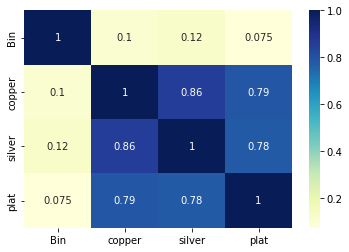

In [17]:
gc = logic("GC=F")


res = pd.concat([gc,copper[["Open"]],silver[["Open"]],plat[["Open"]]],axis=1)
res.columns = ['Bin',"copper",'silver','plat']
res.dropna(inplace=True)

X = res.iloc[:,1:]
y = res.iloc[:,0]

sns.heatmap(res.corr(), cmap="YlGnBu", annot=True)

model = logit('Bin ~ copper + silver + plat', data=res).fit()
model.summary()




In [179]:
X_train, X_test, y_train, y_test = train_test_split(X,y)


model1 = LogisticRegression(max_iter=1500)
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.7861271676300579

In [ ]:
si = logic("SI=F")

res = pd.concat([si,gold[["Open"]],copper[["Open"]],plat[["Open"]]],axis=1)
res.columns = ['Bin','gold','copper','plat']
res.dropna(inplace=True)
X = res.iloc[:,1:]
y = res.iloc[:,0]

model = logit('Bin ~ gold + plat + copper', data=res).fit()
model.summary()



[*********************100%***********************]  1 of 1 completed
Optimization terminated successfully.
         Current function value: 0.630714
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Bin   No. Observations:                 4670
Model:                          Logit   Df Residuals:                     4666
Method:                           MLE   Df Model:                            3
Date:                Thu, 03 Nov 2022   Pseudo R-squ.:                 0.01034
Time:                        19:25:20   Log-Likelihood:                -2945.4
converged:                       True   LL-Null:                       -2976.2
Covariance Type:            nonrobust   LLR p-value:                 2.757e-13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3064      0.104    -12.612      0.000      -1.509      -1.103
gold           0.0004      0.000      3.663      0.000       0.000       0.001
plat           0.0001      0.000      0.799      0.425      -0.000       0.000
copper         0.0161      0.071      0.229      0.819      -0.122       0.154
==============================================================================
"""

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

model1 = LogisticRegression(max_iter=1500)
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.6498287671232876

In [ ]:
hg = logic("HG=F")

res = pd.concat([hg,gold[["Open"]],silver[["Open"]],plat[["Open"]]],axis=1)
res.columns = ['Bin','gold','silver','plat']
res.dropna(inplace=True)
X = res.iloc[:,1:]
y = res.iloc[:,0]

model = logit('Bin ~ gold + plat + silver', data=res).fit()
model.summary()


[*********************100%***********************]  1 of 1 completed
Optimization terminated successfully.
         Current function value: 0.692910
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Bin   No. Observations:                 4670
Model:                          Logit   Df Residuals:                     4666
Method:                           MLE   Df Model:                            3
Date:                Thu, 03 Nov 2022   Pseudo R-squ.:               6.258e-05
Time:                        19:26:57   Log-Likelihood:                -3235.9
converged:                       True   LL-Null:                       -3236.1
Covariance Type:            nonrobust   LLR p-value:                    0.9392
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0230      0.114      0.201      0.841      -0.201       0.247
gold       -3.459e-05      0.000     -0.255      0.798      -0.000       0.000
plat       -8.766e-05      0.000     -0.624      0.532      -0.000       0.000
silver         0.0043      0.010      0.407      0.684      -0.016       0.025
==============================================================================
"""

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

model1 = LogisticRegression(max_iter=1500)
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.5017123287671232

In [ ]:
pl = logic("PL=F")

res = pd.concat([pl,gold[["Open"]],silver[["Open"]],copper[["Open"]]],axis=1)
res.columns = ['Bin','gold','silver','copper']
res.dropna(inplace=True)
X = res.iloc[:,1:]
y = res.iloc[:,0]

model = logit('Bin ~ gold + copper + silver', data=res).fit()
model.summary()

[*********************100%***********************]  1 of 1 completed
Optimization terminated successfully.
         Current function value: 0.541710
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Bin   No. Observations:                 4670
Model:                          Logit   Df Residuals:                     4666
Method:                           MLE   Df Model:                            3
Date:                Thu, 03 Nov 2022   Pseudo R-squ.:                 0.07396
Time:                        19:27:49   Log-Likelihood:                -2529.8
converged:                       True   LL-Null:                       -2731.8
Covariance Type:            nonrobust   LLR p-value:                 2.857e-87
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4829      0.082      5.857      0.000       0.321       0.645
gold          -0.0013      0.000     -8.310      0.000      -0.002      -0.001
copper        -0.2645      0.064     -4.130      0.000      -0.390      -0.139
silver         0.0338      0.010      3.239      0.001       0.013       0.054
==============================================================================
"""

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

model1 = LogisticRegression(max_iter=1500)
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.5008561643835616

# Question 4

For this question use the following [data](https://archive.ics.uci.edu/ml/datasets/credit+approval):


In [127]:
credit = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None)

fn = {'+': 1, '-': 0}

X = credit.replace('?',0).iloc[:,[1,2,7,10,14]]
y = credit.iloc[:,15].map(lambda x: fn.get(x,0))

1. Split the data into training and test set.
2. Write different logistic regression models predicting y against X.
3. Construct [confusion matrices](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test data set for these different models.
4. Analyze these models. Explain which model is the best model you have found.
5. Repeat Steps 1-4 several times. Does your best model stay as the best model? What should be the correct protocol to decide on the best model explaining the data?

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
model1 = LogisticRegression(max_iter=1500)
model1.fit(X_train,y_train)
y_predict = model1.predict(X_test)

print(model1.score(X_test,y_test))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.7514450867052023
[[84 19]
 [24 46]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       103
           1       0.71      0.66      0.68        70

    accuracy                           0.75       173
   macro avg       0.74      0.74      0.74       173
weighted avg       0.75      0.75      0.75       173



In [140]:
y1 = pd.DataFrame(data={"logic": y})
y1

,logic
0,1
1,1
2,1
3,1
4,1
...,...
685,0
686,0
687,0
688,0


In [142]:
adj = pd.concat([X, y1], axis=1)
adj

,1,2,7,10,14,logic
0,30.83,0.000,1.25,1,0,1
1,58.67,4.460,3.04,6,560,1
2,24.50,0.500,1.50,0,824,1
3,27.83,1.540,3.75,5,3,1
4,20.17,5.625,1.71,0,0,1
...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,0,0
686,22.67,0.750,2.00,2,394,0
687,25.25,13.500,2.00,1,1,0
688,17.92,0.205,0.04,0,750,0


<AxesSubplot:>

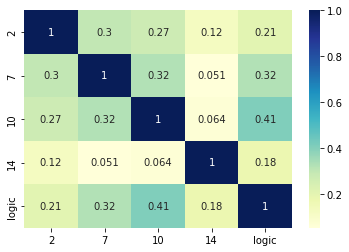

In [143]:
sns.heatmap(adj.corr(), cmap="YlGnBu", annot=True)


,10,7
0,1,1.25
1,6,3.04
2,0,1.50
3,5,3.75
4,0,1.71
...,...,...
685,0,1.25
686,2,2.00
687,1,2.00
688,0,0.04


In [189]:
X_train, X_test, y_train, y_test = train_test_split(X[[10,7]],y)
model1 = LogisticRegression(max_iter=1500)
model1.fit(X_train,y_train)
y_predict = model1.predict(X_test)

print(model1.score(X_test,y_test))
#print(model1.summary())
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

,10,7
600,4,0.540
558,0,0.040
341,0,0.040
73,0,10.750
549,0,16.000
...,...,...
291,1,1.000
29,6,5.000
186,1,3.500
613,2,0.585
